### Reading the data
Throughout this practical session we will use several Python libraries: pandas, numpy, mathplotlib, sklearn; [sklearn](https://scikit-learn.org/stable) offers numerous tools for predictive data analysis, hosting implementations of the most important machine learning tools we'll be using during this topic.

In [1]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt

We'll first read the dataset containing the observations from a csv file on a shared google drive. Those not being able to access google, please download the offline file in Blackboard (asf_amazon.csv), save it to your computer, and change the path in the code below to have it read into the pandas dataframe.

In [2]:
asf_amazon = pd.read_csv("https://drive.google.com/uc?export=download&id=1gYcYOTEHr7d-zh9q-H2i-Gy0leuQUMf3")

### Response, predictors and partitioning the dataset into training and testing subsets
In this exercise we will test several machine learning algorithms to estimate the age of secondary forests as a function of several measurements:

*ASF* = f(*HH*, *HV*, *b1*, *b2*, *b3*, *b4*, *b5*, *b7*)

We will use a 75:25 random partition of the dataset to obtain the training and testing subsets, respectively. The training subset will be used for model fitting, whereas the testing subset will be kept aside and only used when assessing the predictive capability of the models. <span style="color:red">Please note, we need to set a random number so that we can reproduce the results</span>.

In [3]:
y = asf_amazon.ASF ## set the response
X = asf_amazon[['HH','HV','b1','b2','b3','b4','b5','b7']] ## set the predictors
## Split into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

### Fitting random forests models
The scikit-learn library has a specific function to fit random forests models to regression problems. The function is called [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor), and in the link you can learn about the parameters controlling this function.

We'll use a set of loops to test combinations: 
* estimators: 100, 300, 500, 700, 900, 1100
* maximum predictors per split: 2, 3, 4, 5, 6, 7

In [4]:
## Initialise the variables (lists) we want to compute for each fitted model
n_est,max_feat,rmse,bias,var = [],[],[],[],[]

In [5]:
%%time
## For loop to test all combinations of n_est and max_feat
for i in [100,300,500,700,900,1100]:  ## list with the number of estimators to be tested
    for j in [2,3,4,5,6,7]:  ## list with the number of predictors to be tested when splitting a node
        rf = RandomForestRegressor(n_estimators=i, max_features=j, random_state=1234)
        rf.fit(X_train, y_train)
        rf.pred = rf.predict(X_test)
        n_est.append(i)
        max_feat.append(j)
        rmse.append("{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, rf.pred))))
        bias.append("{:.4f}".format(np.mean(y_test - rf.pred)))
        var.append("{:.4f}".format(np.var(y_test - rf.pred)))

Wall time: 1min 33s


In [6]:
## Print the results
##
## First, create a dictionary with the variables and corresponding values
dict_error = {'n_est': n_est, 'max_feat': max_feat, 'rmse': rmse, 'bias': bias,'var': var}
##
## Create a pandas dataframe
table_error = pd.DataFrame(data = dict_error)
print(table_error)

    n_est  max_feat    rmse    bias      var
0     100         2  4.7416  0.2848  22.4021
1     100         3  4.7049  0.3425  22.0187
2     100         4  4.6309  0.3259  21.3391
3     100         5  4.6310  0.2624  21.3769
4     100         6  4.6805  0.3195  21.8047
5     100         7  4.6006  0.2866  21.0830
6     300         2  4.7119  0.2767  22.1257
7     300         3  4.6746  0.3116  21.7550
8     300         4  4.6529  0.3142  21.5507
9     300         5  4.5988  0.2877  21.0659
10    300         6  4.6540  0.3452  21.5409
11    300         7  4.5952  0.3337  21.0043
12    500         2  4.7123  0.2836  22.1251
13    500         3  4.6706  0.3024  21.7234
14    500         4  4.6346  0.3030  21.3874
15    500         5  4.5967  0.2971  21.0417
16    500         6  4.6336  0.3251  21.3642
17    500         7  4.6034  0.3232  21.0872
18    700         2  4.7168  0.2766  22.1714
19    700         3  4.6733  0.3002  21.7499
20    700         4  4.6350  0.2959  21.3955
21    700 

In [7]:
## What's the best model?
##
## First, sort the values by the 'rmse' column
table_error_sort = table_error.sort_values(by=['rmse'], ignore_index=True)
print(table_error_sort)
##
## Choose the best model
## Minimum RMSE
print("\nThe best model is:\n", table_error_sort.iloc[0])

    n_est  max_feat    rmse    bias      var
0     300         7  4.5952  0.3337  21.0043
1     500         5  4.5967  0.2971  21.0417
2     300         5  4.5988  0.2877  21.0659
3     100         7  4.6006  0.2866  21.0830
4     500         7  4.6034  0.3232  21.0872
5     700         7  4.6041  0.3110  21.1013
6     700         5  4.6043  0.2938  21.1134
7    1100         7  4.6131  0.3153  21.1808
8    1100         6  4.6134  0.2992  21.1942
9     900         7  4.6141  0.3146  21.1913
10    900         5  4.6158  0.2902  21.2212
11    700         6  4.6172  0.3092  21.2226
12    900         6  4.6178  0.3004  21.2338
13   1100         5  4.6183  0.2922  21.2429
14    100         4  4.6309  0.3259  21.3391
15    100         5  4.6310  0.2624  21.3769
16   1100         4  4.6336  0.2992  21.3803
17    500         6  4.6336  0.3251  21.3642
18    500         4  4.6346  0.3030  21.3874
19    700         4  4.6350  0.2959  21.3955
20    900         4  4.6408  0.2985  21.4475
21    300 

In [8]:
## Specify, fit and predict with the best Random Forests model
rf_best = RandomForestRegressor(n_estimators=table_error_sort.n_est[0], 
                                max_features=table_error_sort.max_feat[0], 
                                random_state=1234)
rf_best.fit(X_train, y_train)
rf_best.pred = rf_best.predict(X_test)

In [9]:
## Verify the rmse, bias and variance we got above can be replicated
rf_best_rmse = "{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, rf_best.pred)))
rf_best_bias = "{:.4f}".format(np.mean(y_test - rf_best.pred))
rf_best_var  = "{:.4f}".format(np.var(y_test - rf_best.pred))
print('rmse, bias, variance\n', rf_best_rmse, rf_best_bias, rf_best_var)

rmse, bias, variance
 4.5952 0.3337 21.0043


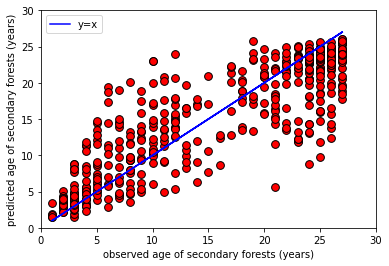

In [10]:
## Plotting the observed vs predicted age of secondary forests
plt.scatter(y_test, rf_best.pred, s=60, edgecolor='black', c='red')
plt.plot(y_test, y_test, c='blue', label='y=x')
plt.xlim([0, 30])
plt.ylim([0, 30])
plt.xlabel("observed age of secondary forests (years)")
plt.ylabel("predicted age of secondary forests (years)")
plt.legend()
plt.show()

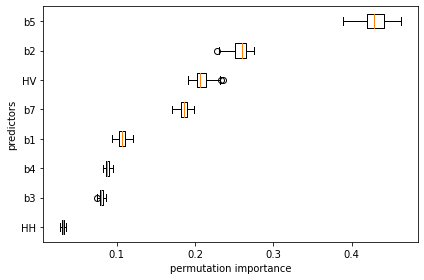

In [11]:
## plotting predictor importance
rf_best_imp = permutation_importance(rf_best, X_train, y_train, n_repeats=100, random_state=1234)
rf_best_sort_imp = rf_best_imp.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(rf_best_imp.importances[rf_best_sort_imp].T,
           vert=False, labels=X_train.columns[rf_best_sort_imp])
plt.xlabel('permutation importance')
plt.ylabel('predictors')
fig.tight_layout()
plt.show()

### Fitting gradient boosting models
The scikit-learn library has a specific function to fit gradient boosting models to regression problems. The function is called [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor), and in the link you can learn about the parameters controlling this function.

We'll use a set of loops to test combinations: 
* estimators: 100, 500, 900, 1100
* maximum predictors per split: 2, 4, 6
* learning rate: 0.001, 0.01, 0.1
* maximum depth: 1, 5, 9


In [12]:
## Initialise the variables (lists) we want to compute for each fitted model
n_est,max_feat,lr_rate,max_dp,rmse,bias,var = [],[],[],[],[],[],[]

In [13]:
%%time
## For loop to test all combinations of n_est, max_feat, lr_rate, max_dp
for i in [100,500,900,1100]:  ## list with the number of estimators to be tested
    for j in [2,4,6]:  ## list with the number of predictors to be tested when splitting a node
        for k in [0.001, 0.01, 0.1]: ## list with the learning rates
            for l in [1, 5, 9]: ## list of trees maximum depth
                gb = GradientBoostingRegressor(n_estimators=i, 
                                               max_features=j, 
                                               learning_rate=k,
                                               max_depth=l,
                                               random_state=1234)
                gb.fit(X_train, y_train)
                gb.pred = gb.predict(X_test)
                n_est.append(i)
                max_feat.append(j)
                lr_rate.append(k)
                max_dp.append(l)
                rmse.append("{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, gb.pred))))
                bias.append("{:.4f}".format(np.mean(y_test - gb.pred)))
                var.append("{:.4f}".format(np.var(y_test - gb.pred)))

Wall time: 2min 40s


In [14]:
## Print the results
##
## First, create a dictionary with our variables and corresponding values
dict_error = {'n_est': n_est, 'max_feat': max_feat, 'lr_rate': lr_rate, 'max_dp': max_dp, 'rmse': rmse, 'bias': bias,'var': var}
##
## Create a pandas dataframe
table_error = pd.DataFrame(data = dict_error)
print(table_error)

     n_est  max_feat  lr_rate  max_dp    rmse    bias      var
0      100         2    0.001       1  8.6404  0.4134  74.4859
1      100         2    0.001       5  8.3859  0.4083  70.1561
2      100         2    0.001       9  8.3212  0.4072  69.0766
3      100         2    0.010       1  7.0389  0.3270  49.4389
4      100         2    0.010       5  5.7932  0.3111  33.4645
..     ...       ...      ...     ...     ...     ...      ...
103   1100         6    0.010       5  4.5459  0.2575  20.5987
104   1100         6    0.010       9  4.5967  0.2651  21.0593
105   1100         6    0.100       1  5.0680  0.2392  25.6279
106   1100         6    0.100       5  4.6255  0.3696  21.2583
107   1100         6    0.100       9  4.6639  0.3161  21.6522

[108 rows x 7 columns]


In [15]:
## What's the best model?
##
## First, sort the values by the 'rmse' column
table_error_sort = table_error.sort_values(by=['rmse'], ignore_index=True)
print(table_error_sort)
##
## Choose the best model model
## Minimum RMSE
print("The best model is:\n", table_error_sort.iloc[0])

     n_est  max_feat  lr_rate  max_dp    rmse    bias      var
0     1100         4    0.010       5  4.5078  0.2250  20.2698
1      900         4    0.010       5  4.5150  0.2121  20.3400
2     1100         4    0.010       9  4.5291  0.2668  20.4417
3      900         4    0.010       9  4.5342  0.2663  20.4879
4      900         6    0.010       5  4.5450  0.2460  20.5968
..     ...       ...      ...     ...     ...     ...      ...
103    100         4    0.001       5  8.3498  0.4157  69.5459
104    100         2    0.001       5  8.3859  0.4083  70.1561
105    100         6    0.001       1  8.5619  0.4154  73.1332
106    100         4    0.001       1  8.5699  0.4147  73.2716
107    100         2    0.001       1  8.6404  0.4134  74.4859

[108 rows x 7 columns]
The best model is:
 n_est          1100
max_feat          4
lr_rate        0.01
max_dp            5
rmse         4.5078
bias         0.2250
var         20.2698
Name: 0, dtype: object


In [16]:
## Specify, fit and predict with the best Gradient Boosting model
gb_best = GradientBoostingRegressor(n_estimators=table_error_sort.n_est[0], 
                                    max_features=table_error_sort.max_feat[0], 
                                    learning_rate=table_error_sort.lr_rate[0],
                                    max_depth=table_error_sort.max_dp[0],
                                    random_state=1234)
gb_best.fit(X_train, y_train)
gb_best.pred = gb_best.predict(X_test)

In [17]:
## Verify the rmse, bias and variance we got above can be replicated
gb_best_rmse = "{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, gb_best.pred)))
gb_best_bias = "{:.4f}".format(np.mean(y_test - gb_best.pred))
gb_best_var  = "{:.4f}".format(np.var(y_test - gb_best.pred))
print('rmse, bias, variance\n', gb_best_rmse, gb_best_bias, gb_best_var)

rmse, bias, variance
 4.5078 0.2250 20.2698


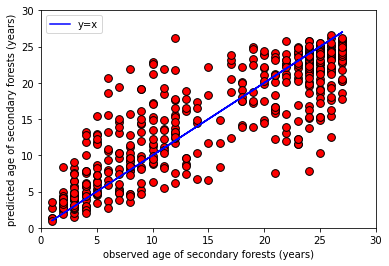

In [18]:
## Plotting the observed vs predicted age of secondary forests
plt.scatter(y_test, gb_best.pred, s=60, edgecolor='black', c='red')
plt.plot(y_test, y_test, c='blue', label='y=x')
plt.xlim([0, 30])
plt.ylim([0, 30])
plt.xlabel("observed age of secondary forests (years)")
plt.ylabel("predicted age of secondary forests (years)")
plt.legend()
plt.show()

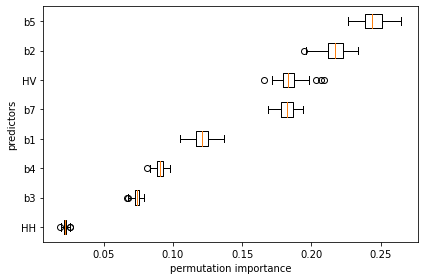

In [19]:
## Plotting predictor importance
gb_best_imp = permutation_importance(gb_best, X_train, y_train, n_repeats=100, random_state=1234)
gb_best_sort_imp = gb_best_imp.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(gb_best_imp.importances[gb_best_sort_imp].T,
           vert=False, labels=X_train.columns[gb_best_sort_imp])
plt.xlabel('permutation importance')
plt.ylabel('predictors')
fig.tight_layout()
plt.show()

### If we have time ... methods to optimise parameter tuning
There are some methods to optimise parameter tuning:
* *Exhaustive Grid Search*: brute force approach that scans the whole grid of parameters combinations in some order, computes the cross-validation loss for each one and finds the optimal combination in this manner.
* *Bayesian Hyper-Parameter Tuning*: a probabilistic model based approach for finding the minimum of any function that returns a real-value metric. This function may be as simple as f(x) = x², or it can be as complex as the validation error of a deep neural network with respect to hundreds of model architecture and hyperparameter choices. Recent results suggest Bayesian hyperparameter optimization of machine learning models is more efficient than manual, random, or grid search with i) better overall performance on the test set, and ii) less time required for optimization.

In [20]:
## First, we'll need to import several libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

In [21]:
## Gradient boosting hyper-parameter space
n_pred = X_train.shape[1] ## number of predictors
space  = [Integer(100, 1100, name='n_estimators'),
          Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_pred, name='max_features')]

In [22]:
@use_named_args(space)
def objective(**params):
    reg = GradientBoostingRegressor(random_state=1234)
    reg.set_params(**params)
    return -np.mean(cross_val_score(reg, 
                                    X_train, 
                                    y_train, 
                                    cv=10, 
                                    n_jobs=-1,
                                    scoring='neg_mean_squared_error'))

In [23]:
%%time
res_gp = gp_minimize(objective, space, acq_func ="EI", n_calls=100, random_state=1234)

Wall time: 3min 53s


In [24]:
print("""Best parameters:
- n_estimators=%d
- max_depth=%d
- learning_rate=%.6f
- max_features=%d""" % (res_gp.x[0], 
                        res_gp.x[1],
                        res_gp.x[2], 
                        res_gp.x[3]))

Best parameters:
- n_estimators=1100
- max_depth=4
- learning_rate=0.009820
- max_features=4


In [25]:
## Specify, fit and predict with the best Gradient Boosting model with Bayesian optimisation
gb_bayes = GradientBoostingRegressor(n_estimators=res_gp.x[0], 
                                     max_depth=res_gp.x[1],
                                     learning_rate=res_gp.x[2],
                                     max_features=res_gp.x[3], 
                                     random_state=1234)
gb_bayes.fit(X_train, y_train)
gb_bayes.pred = gb_bayes.predict(X_test)

In [27]:
## Compute the rmse, bias and variance from the model selected using Bayesian optimisation
gb_bayes_rmse = "{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, gb_bayes.pred)))
gb_bayes_bias = "{:.4f}".format(np.mean(y_test - gb_bayes.pred))
gb_bayes_var  = "{:.4f}".format(np.var(y_test - gb_bayes.pred))
print('rmse, bias, variance\n', gb_bayes_rmse, gb_bayes_bias, gb_bayes_var)

rmse, bias, variance
 4.6322 0.2330 21.4029
